In [2]:
#Necesario Importar module1
import module1
import pandas as pd
import nltk #librería natural language toolkit
from nltk.tokenize import RegexpTokenizer #para tokenizar con expresiones regulares
from nltk.corpus import stopwords #para quitar stopwords
import gensim #modelos de semantica latente
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import pyLDAvis #para visualizar los modelos de topicos
import pyLDAvis.gensim_models as gensimvis
import re
import string
from sentiment_analysis_spanish import sentiment_analysis
df1 = pd.read_excel('stop_w.xlsx')
stop=list(df1['Palabras_stop'])
import spacy
from spacy.lang.es.examples import sentences 
nlp = spacy.load('es_core_news_sm')
from PIL import Image
import matplotlib.pyplot as plt
from wordcloud import WordCloud

d:\Python\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator CountVectorizer from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MultinomialNB from version 0.23.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [3]:
urls = pd.read_excel('links.xlsx',sheet_name='policial')
urls1 = pd.read_excel('links.xlsx',sheet_name='salud')
urls2 = pd.read_excel('links.xlsx',sheet_name='economía')

In [4]:
Base_Policial=module1.AllNoti(urls,token=True)
Base__Salud=module1.AllNoti(urls1,token=True)
Base__Econo=module1.AllNoti(urls2,token=True)

In [5]:
#Lista inicial de StopWords
stop1=list(['encontrar','habria','segun','cl','mas','titular','llegar','querer','entregado','encontrar',
            'chvnoticias','monedir','jueves','trav','metropolitana','año','miercol','junio','sabado',
            'metros','alpes','lunes','común','lún','habriar','mañana','realizar él','ximén','t','agrego',
            'antonio','explico','san','tambien','doce','chilenos','aguilero','viernes','mes','indico',
            'hora','nota','indicar','chileno','abril','mayo','julio','sero','paltar'])+stop
a=module1.leman(Base_Policial,stop1)
b=module1.leman(Base__Salud,stop1)
c=module1.leman(Base__Econo,stop1)

In [ ]:
#Frecuencias
module1.TopWords(a,n=30)
module1.TopWords(b,n=30)
module1.TopWords(c,n=30)

In [ ]:
#Nuve de Palabras
n=50
letter=['T13','TVN','MEGA','CHV']
for i in range(0,4):
    frecuencia = nltk.FreqDist(a[i])
    wc = WordCloud(background_color="white",width=2000,height=1000, max_words=n,normalize_plurals=False).generate_from_frequencies(frecuencia)
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.title(letter[i])
    plt.show()
n=50
letter=['T13','TVN','MEGA','CHV']
for i in range(0,4):
    frecuencia = nltk.FreqDist(b[i])
    wc = WordCloud(background_color="white",width=2000,height=1000, max_words=n,normalize_plurals=False).generate_from_frequencies(frecuencia)
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.title(letter[i])
    plt.show()
n=50
letter=['T13','TVN','MEGA','CHV']
for i in range(0,4):
    frecuencia = nltk.FreqDist(c[i])
    wc = WordCloud(background_color="white",width=2000,height=1000, max_words=n,normalize_plurals=False).generate_from_frequencies(frecuencia)
    plt.figure()
    plt.imshow(wc)
    plt.axis("off")
    plt.title(letter[i])
    plt.show()

In [6]:
#Counterizacion Para cambiar de topico cambiar c[i] por a[i] o b[i]
from sklearn.feature_extraction.text import CountVectorizer
data_count=pd.DataFrame([' '.join(c[0]),' '.join(c[1]),' '.join(c[2]),' '.join(c[3])],index=['T13','TVN','MEGA','CHV'],columns=['Titulares'])
data_count.Titulares=module1.Remplace(data_count.Titulares)
cv=CountVectorizer(max_features=1202,lowercase=True,analyzer='word')
data_cv=cv.fit_transform(data_count.Titulares)
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names_out(),index=['T13','TVN','MEGA','CHV'])
data_dtm

,abordar,academico,acceder,accesorio,acercar,acompañamiento,acordar,acorde,acordo,acotado,...,volumen,volvera,votar,vulnerable,web,wti,zapatilla,zelando,zona,él
T13,0,4,0,0,0,0,0,3,0,2,...,2,0,2,1,2,1,0,0,1,6
TVN,0,1,1,2,1,0,1,0,1,0,...,0,0,1,1,0,0,2,0,2,4
MEGA,0,0,0,0,0,0,1,2,1,4,...,0,0,1,1,1,1,0,2,0,5
CHV,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,3


In [9]:
#Proporcion mismo tratamiento que los counter
from sklearn.feature_extraction.text import TfidfVectorizer
data_count=pd.DataFrame([' '.join(b[0]),' '.join(b[1]),' '.join(b[2]),' '.join(b[3])],index=['T13','TVN','MEGA','CHV'],columns=['Titulares'])
cv=TfidfVectorizer(max_features=1000,lowercase=True,analyzer='word')
data_cv=cv.fit_transform(data_count.Titulares)
data_dtm=pd.DataFrame(data_cv.toarray(),columns=cv.get_feature_names_out(),index=['T13','TVN','MEGA','CHV'])
from sklearn.metrics.pairwise import cosine_similarity
similarity_matrix = cosine_similarity(data_dtm)
similarity_matrix

array([[1.        , 0.61397886, 0.60956622, 0.54881036],
       [0.61397886, 1.        , 0.59777522, 0.50957376],
       [0.60956622, 0.59777522, 1.        , 0.55107216],
       [0.54881036, 0.50957376, 0.55107216, 1.        ]])

In [ ]:
#Grafico de COrrelacion
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
ax = plt.axes()
x_axis_labels = ['T13','TVN','MEGA','CHV'] # labels for x-axis
y_axis_labels = ['T13','TVN','MEGA','CHV'] # labels for y-axis
sns.heatmap(similarity_matrix,xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, ax=ax)
ax.set_title('Similitud coseno Economía')
plt.show()

In [11]:

from pysentimiento import create_analyzer
analyzer = create_analyzer(task="sentiment", lang="es")


d:\Python\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [49]:
#Stop para LDA
stop1=list(['encontrar','habria','segun','cl','mas','titular','llegar','querer','entregado','encontrar',
            'chvnoticias','monedir','jueves','trav','año','miercol','junio','sabado',
            'metros','alpes','lunes','común','lún','habriar','mañana','realizar él','ximén','t','agrego',
            'antonio','explico','san','tambien','doce','chilenos','aguilero','viernes','mes','indico',
            'hora','nota','indicar','chileno','abril','mayo','julio','sero','paltar','agustin','ximena',
            'martinez','david','buhvhdzolb','valdebenitir','domingo','boric','aguirre','christiar','avila',
            'garcia','agosto','mañalich','mañalich','virusrespiratorio','aco','alejandro','viña'
            ,'jmanalich','claudio','vicuña','drtedrir','inter','decimoquintir','tvnplay','martes',',may',
            'gabriel','pardow','gzsvsfscit','lt','pp','mascaril él','oponer él','txt','valdebenito',
            'rene','ir','castillo','usar','adema','miercoles'])+stop

In [ ]:
#Tokenizador y lematizador para LDA 
import simplemma
from simplemma import simple_tokenizer
def leman2(y,s):
    x=y
    for i in range(len(x)):
        x[i]=simple_tokenizer(x[i], iterate=False)
        x[i]=[word for word in x[i] if word not in stop1]
        x[i]=[simplemma.lemmatize(t, lang='es') for t in x[i]]
        x[i]=' '.join(x[i])
        x[i]=x[i]=simple_tokenizer(x[i], iterate=False)
    return x


In [180]:
#Base Policial Para LDA, toma todas las noticias por separado
Base_Policial=module1.AllNoti0(urls,unit=True)
y=pd.DataFrame([Base_Policial.T13.apply(module1.Lp2),
                              Base_Policial.TVN.apply(module1.Lp2),
                              Base_Policial.MEGA.apply(module1.Lp2),
                              Base_Policial.CHV.apply(module1.Lp2)])
y=y.transpose()
y=pd.DataFrame([module1.limpieza1(y.T13),module1.limpieza1(y.TVN),module1.limpieza1(y.MEGA),module1.limpieza1(y.CHV)])
y=y.transpose()
Policial1=leman2(y.T13,stop1)
Policial2=leman2(y.TVN,stop1)
Policial3=leman2(y.MEGA,stop1)
Policial4=leman2(y.CHV,stop1)

In [362]:
#Filtro de palabras para eliminar las frecuencias de 2 o menos dependiendo del noticiero
from collections import defaultdict

def eliminar_palabras_infrecuentes(listas):
    frecuencia = defaultdict(int)

    # Calcular la frecuencia de cada palabra en todas las listas
    for lista in listas:
        for palabra in lista:
            frecuencia[palabra] += 1
    
    # Eliminar palabras con frecuencia menor a 2
    listas_filtradas = []
    for lista in listas:
        lista_filtrada = [palabra for palabra in lista if frecuencia[palabra] >2]
        listas_filtradas.append(lista_filtrada)
    
    return listas_filtradas
# Ejemplo de uso para estudiar distintos LDA cambiar Policial1 2 3 4
listas_filtradas = eliminar_palabras_infrecuentes(Policial4)
print(listas_filtradas)

[['asalto', 'comuna', 'victimar', 'sujeto', 'robo', 'sujeto', 'victimar', 'año'], ['delincuente', 'oficina', 'central', 'robo', 'antisocial', 'recinto', 'cometer', 'carabinero', 'indicar'], ['comuna', 'noche', 'trasladar', 'policial'], ['cabo', 'funcionario', 'policial', 'santiago', 'funcionario', 'año', 'ocurrio', 'madrugada', 'central', 'institucion', 'institucion', 'arma', 'ocurrio', 'uniformar', 'motocicleta', 'arma', 'fuego', 'llevar', 'cabo', 'funcionario', 'ingreso', 'institucion', 'institucion', 'indicar', 'cuerpo', 'llevar', 'ingreso', 'carabinero', 'ingreso', 'santiago', 'cabo', 'policial', 'santiago', 'institucion', 'arma', 'carabinero'], ['carabinero', 'ocurrio', 'adema', 'fuego'], ['madrugada', 'comuna', 'motocicleta', 'vehicular', 'publicar', 'cuerpo', 'investigación', 'carabinero', 'sujeto', 'trasladar'], ['delincuente', 'oficina', 'central', 'robo', 'antisocial', 'recinto', 'cometer', 'carabinero', 'indicar'], ['violento', 'carabinero', 'funcionario', 'motocicleta', 'su

In [296]:
#Contador de palanbras
from collections import defaultdict
def eli(listas):
    frecuencia = defaultdict(int)

    # Calcular la frecuencia de cada palabra en todas las listas
    for lista in listas:
        for palabra in lista:
            frecuencia[palabra] += 1
    
    # Eliminar palabras con frecuencia menor a 2
    listas_filtradas = []
    for lista in listas:
        lista_filtrada = [palabra for palabra in lista if frecuencia[palabra] > 0]
        listas_filtradas.append(lista_filtrada)
    
    return listas_filtradas
# Ejemplo de uso

In [307]:
#TAbla de cantidad de palabras distintas en cada noticia de Policial
def totalW(x):
    xn=[]
    for i in range(len(x)):
      xn.append(len(x[i]))
    return xn
FREQ=pd.DataFrame([totalW(eli(Policial1)),totalW(eli(Policial2)),
                   totalW(eli(Policial3)),totalW(eli(Policial4))],index=['T13','TVN','Mega','CHV'])
FREQ
    

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
T13,67,79,39,68,47,76,79,80,130,76,136,122,143,78
TVN,57,117,80,97,78,62,117,54,90,72,114,93,63,50
Mega,125,172,149,205,167,112,111,134,123,143,152,137,118,140
CHV,28,34,33,103,54,41,34,34,42,30,91,32,32,37


In [57]:
#eliminardor de palabras especificas que no filtra el stopWord
def eliminar(palabra, listas):
    for lista in listas:
        if palabra in lista:
            lista.remove(palabra)
    return listas
            

In [ ]:
#TVN
eliminar('ir',listas_filtradas)
eliminar('adema',listas_filtradas)
eliminar('usar',listas_filtradas)

In [ ]:
#MEGA
eliminar('ir',listas_filtradas)
eliminar('adema',listas_filtradas)
eliminar('usar',listas_filtradas)
eliminar('lete',listas_filtradas)
eliminar('matta',listas_filtradas)
eliminar('quilicura',listas_filtradas)
#
eliminar('vergara',listas_filtradas)
eliminar('navia',listas_filtradas)
eliminar('tio',listas_filtradas)
eliminar('recoleto',listas_filtradas)
eliminar('cerrillos',listas_filtradas)
eliminar('quilicura',listas_filtradas)
eliminar('data',listas_filtradas)
eliminar('colina',listas_filtradas)
eliminar('conchali',listas_filtradas)

In [ ]:
#Ver cantidad de topicos optimos mediante u_mass
# # #creamos un diccionario con las palabras de los textos
diccionario = gensim.corpora.Dictionary(listas_filtradas)
#guardamos nuestro diccionario
diccionario.save('dictionario.dict')
#creamos el corpus para darle al modelo (segun el formato de esta libreria)
corpus = [diccionario.doc2bow(text) for text in listas_filtradas]

gensim.corpora.MmCorpus.serialize('corpora.mm',corpus)
for i in range(1,14):
    lda=LdaModel(corpus=corpus, id2word=diccionario, num_topics=2,passes=300,alpha='auto',chunksize=1000, per_word_topics=False,random_state=i)
    lda_vis = gensimvis.prepare(lda, corpus, diccionario)
    #pyLDAvis.display(lda_vis)

    cm = CoherenceModel(model=lda, corpus= corpus, dictionary = diccionario, coherence='u_mass')
    coherence = cm.get_coherence_per_topic()  # get coherence value
    print(coherence)

In [364]:
##Semillas(random_state):T13=4, TVN=94, MEGA=9, CHV=94
#LDA, numtopics indica el numero de topicos, escribir el indicado en el informe
#creamos un diccionario con las palabras de los textos
diccionario = gensim.corpora.Dictionary(listas_filtradas)
#guardamos nuestro diccionario
diccionario.save('dictionario.dict')
#creamos el corpus para darle al modelo (segun el formato de esta libreria)
corpus = [diccionario.doc2bow(text) for text in listas_filtradas]

gensim.corpora.MmCorpus.serialize('corpora.mm',corpus)

lda=LdaModel(corpus=corpus, id2word=diccionario, num_topics=2,passes=300,alpha='auto',chunksize=1000, per_word_topics=False,random_state=94)
lda_vis = gensimvis.prepare(lda, corpus, diccionario)
pyLDAvis.display(lda_vis)

In [ ]:
#Coherencia
cm = CoherenceModel(model=lda, corpus= corpus, dictionary = diccionario, coherence='u_mass')
coherence = cm.get_coherence_per_topic()  # get coherence value
print(coherence)

In [319]:
lda=LdaModel(corpus=corpus, id2word=diccionario, num_topics=2,passes=300,alpha='auto',chunksize=1000, per_word_topics=False,random_state=94)
lda_vis = gensimvis.prepare(lda, corpus, diccionario)
    #pyLDAvis.display(lda_vis)

cm = CoherenceModel(model=lda, corpus= corpus, dictionary = diccionario, coherence='u_mass')
coherence = cm.get_coherence_per_topic()  # get coherence value
print(coherence)

[-3.7951134986227335, -6.335127577681695]


C:\Users\vicer\AppData\Local\Temp\ipykernel_30708\3965957665.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')


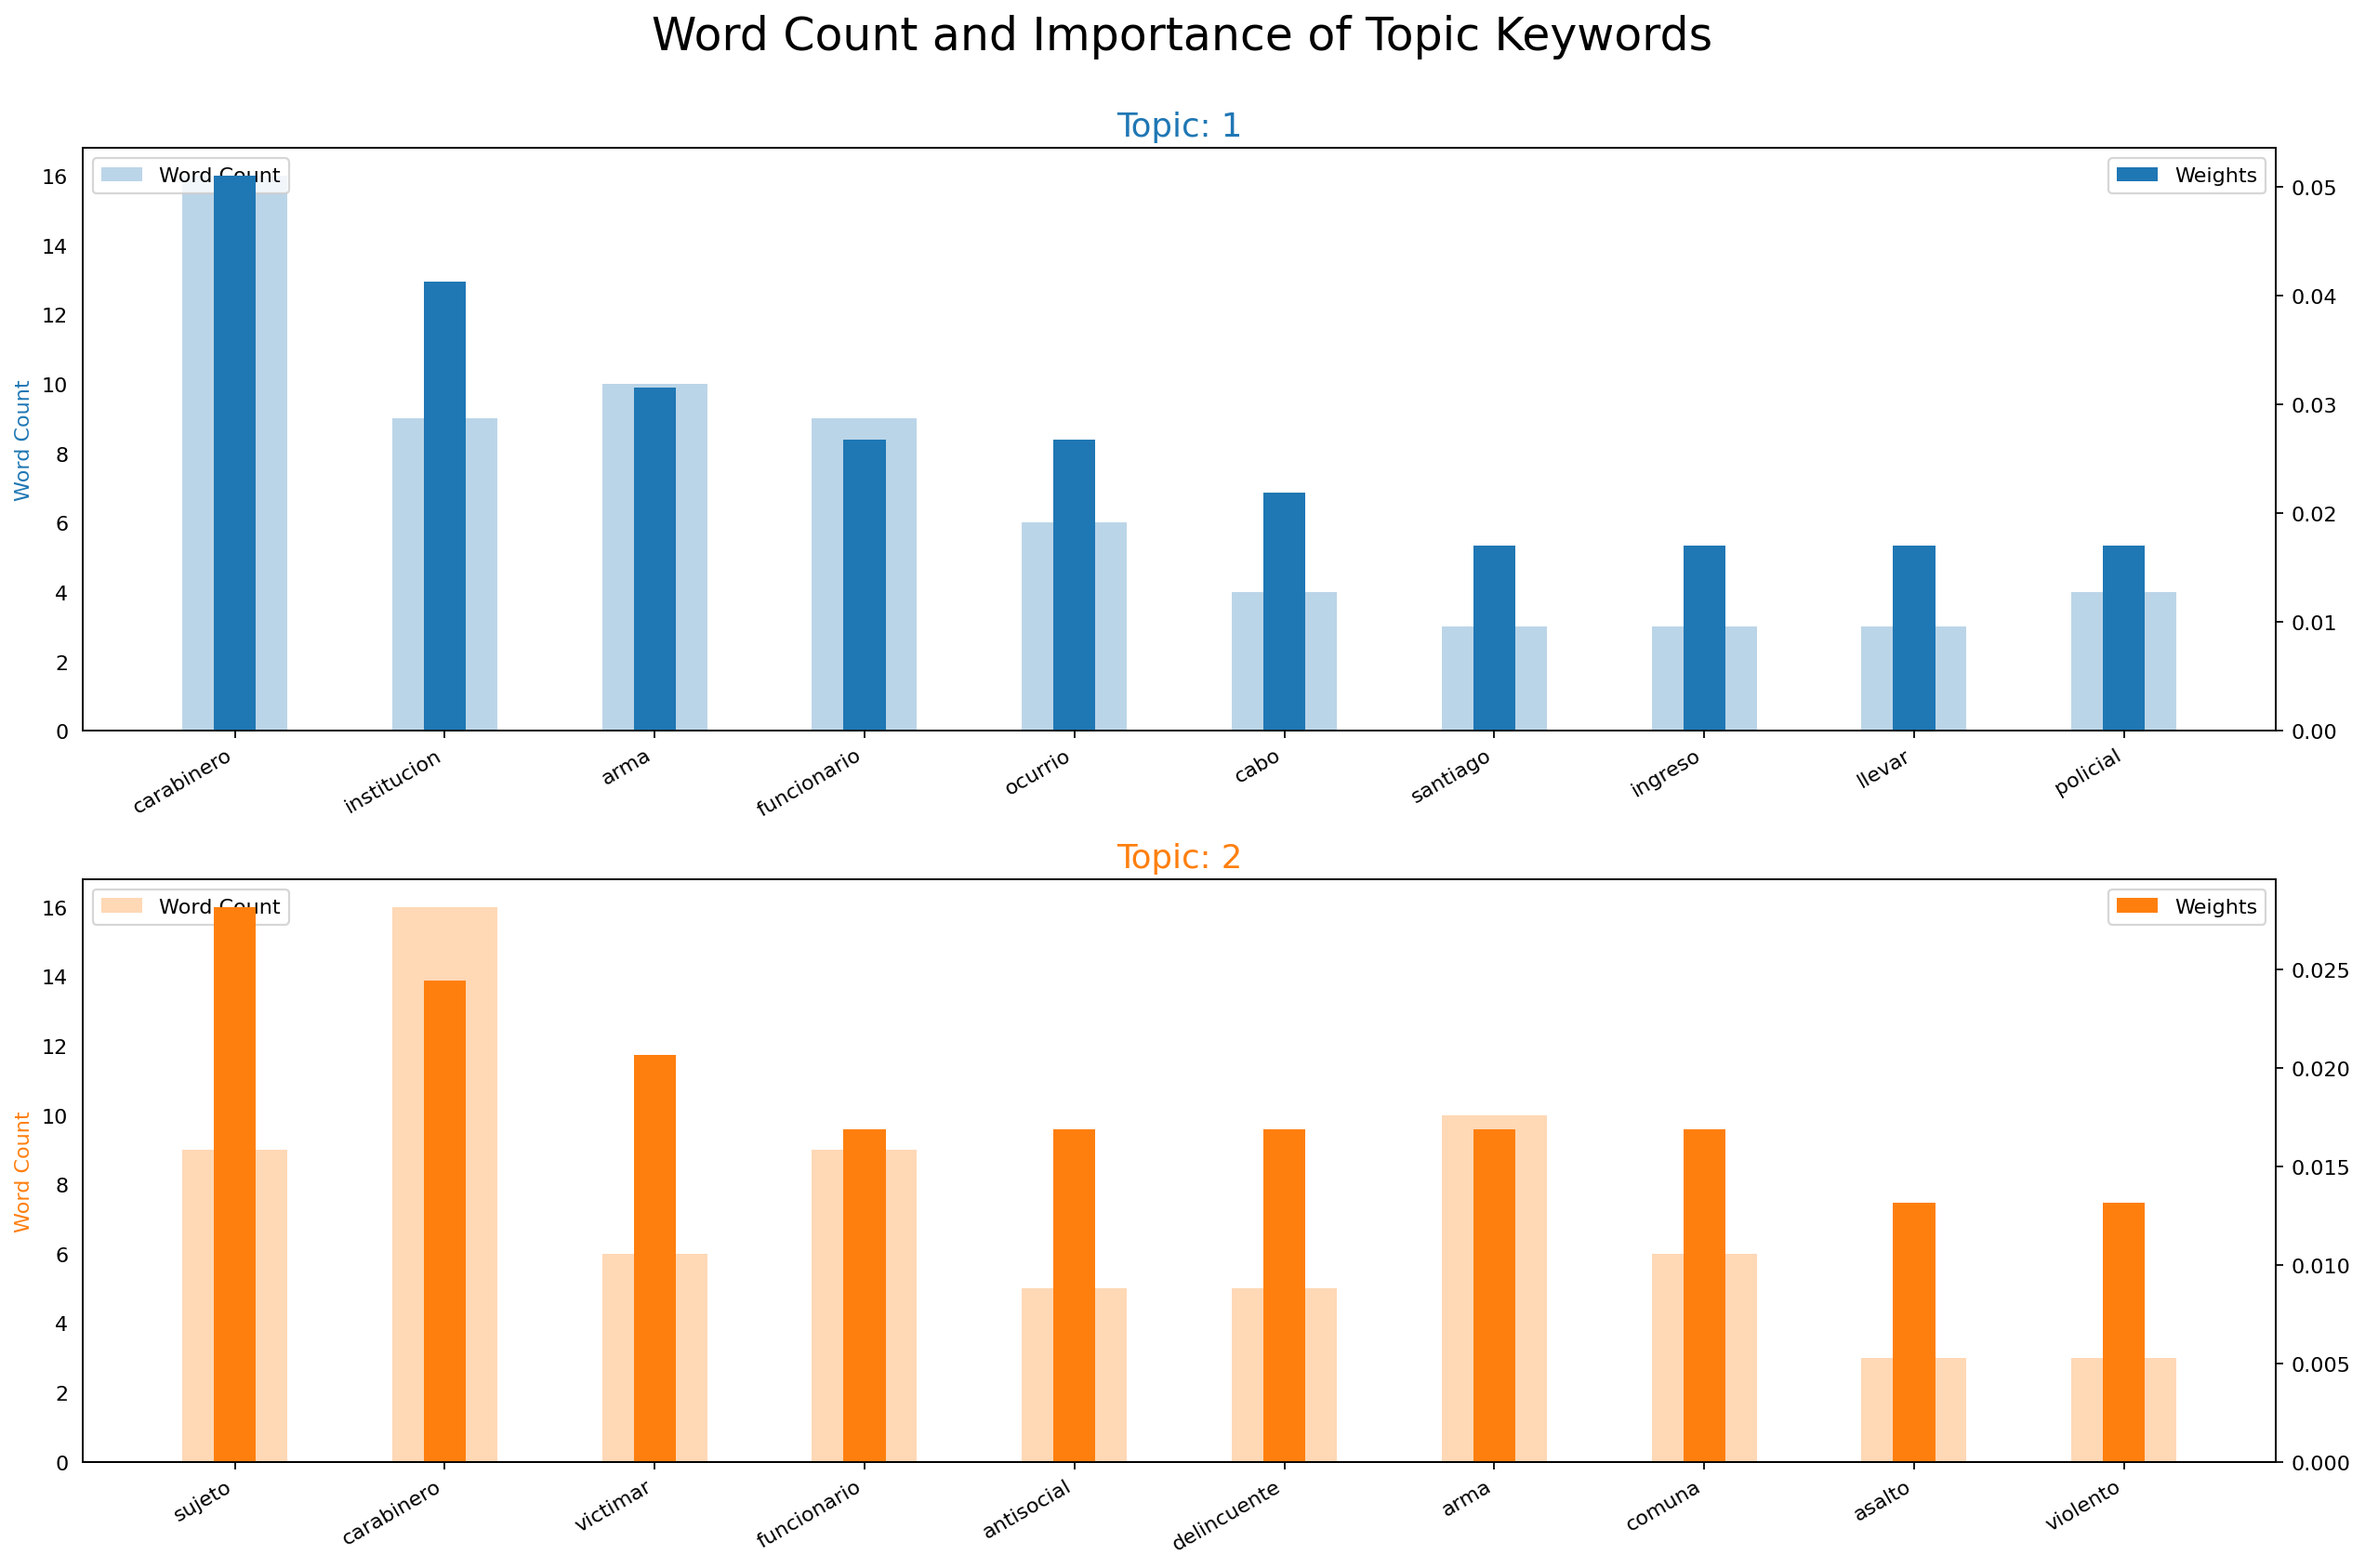

In [225]:
#Grafico de Frecencias
import matplotlib.colors as mcolors
from collections import Counter
topics = lda.show_topics(formatted=False)
data_flat = [w for w_list in listas_filtradas for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2,1, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 0)
    ax.set_title('Topic: ' + str(i+1), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()